# Pendulum: Phase Portrait

This notebook visualizes the phase portrait of the simple pendulum using the project's `DynamicalSystemSpec` utilities. We plot x1 (angle) on the x-axis and x2 (angular velocity) on the y-axis.

- System: `pendulum`
- State: `[x1, x2]` where x1 is angle (rad), x2 is angular velocity (rad/s)
- Integrator: RK4 via project utilities



In [9]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt

from data import pendulum_spec, simulate_system

# Reproducibility
rng = np.random.default_rng(0)

spec = pendulum_spec()



In [10]:
# Parameters
num_steps = 2000
num_trajectories = 12
dt = 0.01
noise_std = 0.0

# Simulate multiple trajectories
trajectories = []
for _ in range(num_trajectories):
    states, _ = simulate_system(spec, num_steps=num_steps, dt=dt, noise_std=noise_std, rng=rng)
    trajectories.append(states)
trajectories = np.stack(trajectories)  # [N, T, 2]

trajectories.shape


(12, 2000, 2)

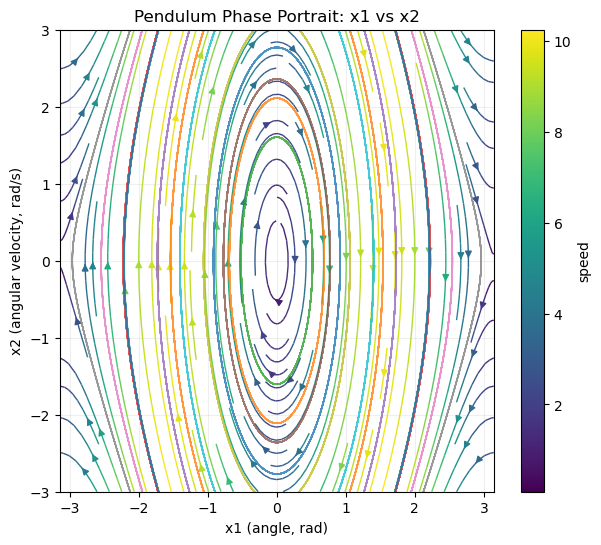

In [11]:
# Phase portrait grid
x1_min, x1_max = -np.pi, np.pi
x2_min, x2_max = -3.0, 3.0
n = 40
x1 = np.linspace(x1_min, x1_max, n)
x2 = np.linspace(x2_min, x2_max, n)
X1, X2 = np.meshgrid(x1, x2)

# Vector field f(x) = [x2, -g/l * sin(x1)]
g_over_l = 9.81 / 1.0
dX1 = X2
dX2 = -g_over_l * np.sin(X1)

speed = np.sqrt(dX1**2 + dX2**2)

fig, ax = plt.subplots(figsize=(7, 6))
strm = ax.streamplot(X1, X2, dX1, dX2, color=speed, cmap="viridis", density=1.2, linewidth=1)
cb = fig.colorbar(strm.lines, ax=ax, label="speed")

# Overlay a few simulated trajectories
for traj in trajectories:
    ax.plot(traj[:, 0], traj[:, 1], alpha=0.8, lw=1.0)

ax.set_xlabel("x1 (angle, rad)")
ax.set_ylabel("x2 (angular velocity, rad/s)")
ax.set_title("Pendulum Phase Portrait: x1 vs x2")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])
ax.grid(True, alpha=0.2)
plt.show()
